In [1]:
# Based on the data more than 62% of the fares were originated from urban desginsted cities. 

In [2]:
# Based on the data more than 68% of the rides were generated from urban desginsted cities. 

In [3]:
# Based on the data more than 86% of the drivers work within urban desginsted cities. 

# Pyber Ride Sharing 

In [4]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
glob.glob('*.csv')

['city_data.csv', 'ride_data.csv']

In [6]:
_city=pd.read_csv('city_data.csv')
ride=pd.read_csv('ride_data.csv') 
joined=pd.merge(_city, ride, on='city', how='outer')
joined.shape

(2375, 6)

In [7]:
joined['type_color'] = joined['type'].map(lambda x: 'gold' if x == 'Urban' else('lightcoral' if x == 'Suburban' else 'lightskyblue'))  

# adding a column to differentiate  each city by color.

In [8]:
avgfarebycity=joined.groupby('city')['fare'].mean() # Average fare/city
totalridebycity=joined.groupby('city')['ride_id'].count() # Total ride per city
drivertotalbycity=joined.groupby('city')['driver_count'].sum() # driver count by city

In [9]:
citybytype=joined.groupby(['city','type','type_color'])[['ride_id']].count().reset_index().set_index("city")
# Creates a df from the existing df based on the above filters. 

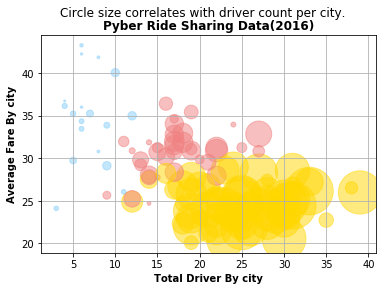

In [10]:
scatter = plt.figure()
ax = scatter.add_subplot(1,1,1)
ax.scatter(x=totalridebycity, y=avgfarebycity, s=drivertotalbycity, c=citybytype.type_color, alpha=.5)
ax.grid()
#plt.legend(loc='best')
ax.set_title('Total Ride By City',fontweight='bold')
ax.set_xlabel('Total Driver By city',fontweight='bold')
ax.set_ylabel('Average Fare By city',fontweight='bold')
plt.suptitle('Note:')
plt.suptitle('Circle size correlates with driver count per city.')
plt.title('Pyber Ride Sharing Data(2016)',fontweight='bold');
#add legend 

# Total Fares by City Type

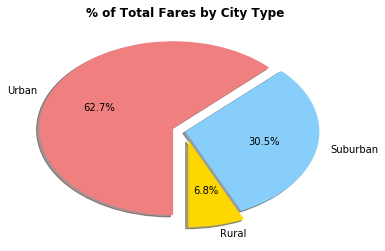

In [11]:
totalfarebycitytype=joined.groupby('type')['fare'].sum() # total fare by city type
labels = 'Rural','Suburban', 'Urban'
sizes = [15, 45, 30]
explode = (0.1, 0, 0.1) 
colors = ['gold', 'lightskyblue', 'lightcoral']
plt.pie(totalfarebycitytype, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',shadow=True, startangle=270);
plt.title('% of Total Fares by City Type',fontweight='bold');

# Total Rides by City Type

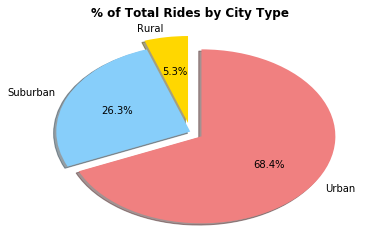

In [12]:
totalridebycitytype=joined.groupby('type')['ride_id'].count() # total fare by city type
labels = 'Rural','Suburban', 'Urban'
sizes = [15, 45, 30]
explode = (0.1, 0, 0.1) 
colors = ['gold', 'lightskyblue', 'lightcoral']
plt.pie(totalridebycitytype, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',shadow=True, startangle=90);
plt.title('% of Total Rides by City Type',fontweight='bold');

# Total Drivers by City Type

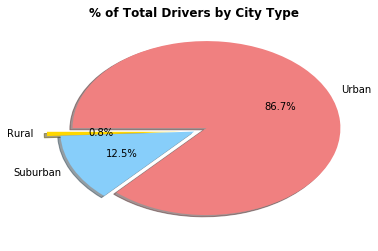

In [13]:
totaldriverbycitytype=joined.groupby('type')['driver_count'].sum() # total fare by city type
labels = 'Rural','Suburban', 'Urban'
sizes = [15, 45, 30]
explode = (0.1, 0, 0.1) 
colors = ['gold', 'lightskyblue', 'lightcoral']
plt.pie(totaldriverbycitytype, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',shadow=True, startangle=180);
plt.title('% of Total Drivers by City Type',fontweight='bold');